Estatísticas descritivas do conjunto de treinamento:
           num_fotos  ano_de_fabricacao    ano_modelo      hodometro  \
count  29405.000000       29582.000000  29582.000000   29582.000000   
mean      10.323822        2016.758603   2017.809073   58429.744912   
std        3.487392           4.062480      2.673844   32560.293544   
min        8.000000        1985.000000   1997.000000     100.000000   
25%        8.000000        2015.000000   2016.000000   31214.500000   
50%        8.000000        2018.000000   2018.000000   57434.000000   
75%       14.000000        2019.000000   2020.000000   81953.000000   
max       21.000000        2022.000000   2023.000000  390065.000000   

         num_portas  veiculo_alienado         preco  
count  29582.000000               0.0  2.958200e+04  
mean       3.940673               NaN  1.330204e+05  
std        0.338371               NaN  8.166167e+04  
min        2.000000               NaN  9.869951e+03  
25%        4.000000               Na

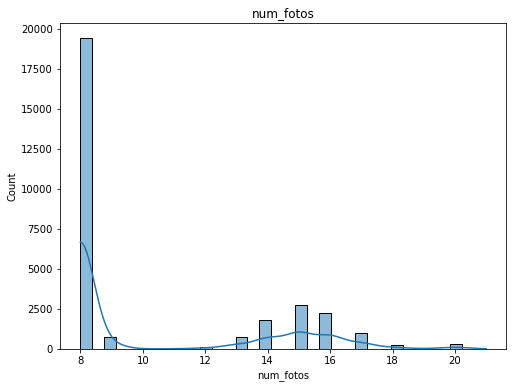

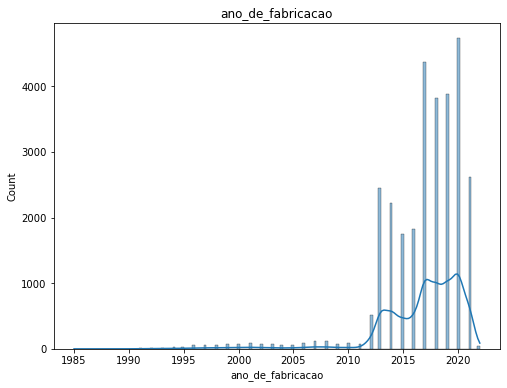

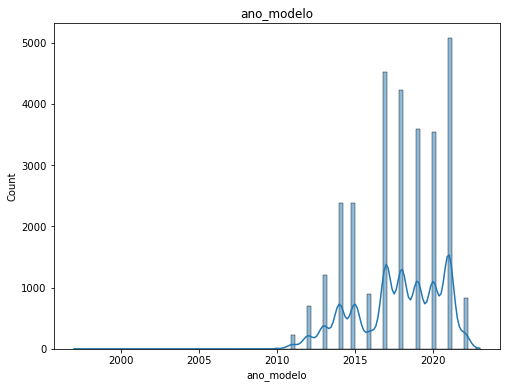

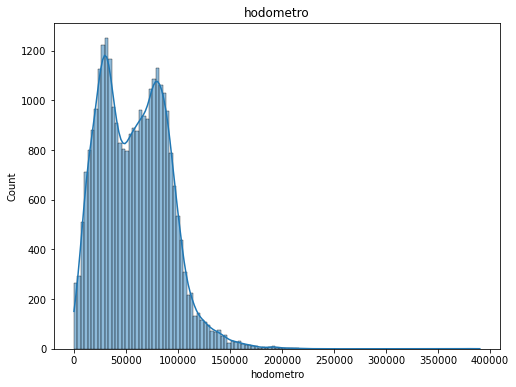

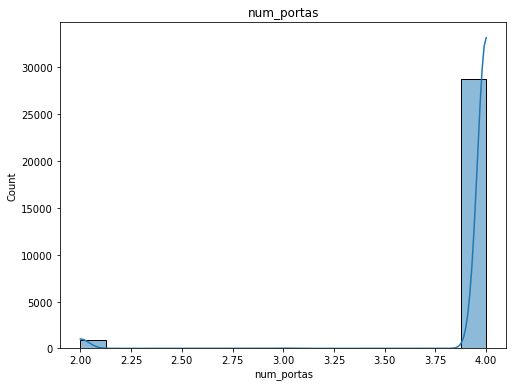

Melhor estado para vender carros de marca popular:  S�o Paulo (SP)
Não há dados suficientes para determinar o melhor estado para comprar picape com transmissão automática.
Não há dados suficientes para determinar o melhor estado para comprar carros com garantia de fábrica.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current f

In [ ]:
import pandas as pd
import pandas_profiling
import pandas_profiling as pp
import ydata_profiling
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from unidecode import unidecode
from fuzzywuzzy import process
from matplotlib import font_manager as fm
from matplotlib import font_manager
from pathlib import Path

train_data = pd.read_csv('D:/Indicium/desafio/cars_train.csv')
test_data = pd.read_csv('D:/Indicium/desafio/cars_test.csv')

# Estatísticas descritivas do conjunto de treinamento
train_stats = train_data.describe()

# Estatísticas descritivas do conjunto de teste
test_stats = test_data.describe()

# Exibindo as estatísticas descritivas
print("Estatísticas descritivas do conjunto de treinamento:\n", train_stats)
print("\nEstatísticas descritivas do conjunto de teste:\n", test_stats)

# Selecionando as colunas numéricas para a visualização
numeric_cols = ['num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas']

# Especifique o caminho para o arquivo de fonte TrueType (.ttf)
font_path = Path('D:/Indicium/desafio/font/Kratos TrueType.ttf')

# Obtenha o nome da fonte a partir do caminho absoluto
custom_font_prop = font_manager.FontProperties(fname=font_path)
custom_font_name = custom_font_prop.get_name()

# Defina a fonte personalizada como a fonte padrão para o matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = custom_font_name

# Plotando gráficos de histograma para as colunas numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(col)
    plt.show()

# a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
popular_brands = ['FIAT', 'FORD', 'VOLKSWAGEN', 'CHEVROLET']  
best_state_selling_popular_cars = train_data[train_data['marca'].isin(popular_brands)]['estado_vendedor'].mode()
if len(best_state_selling_popular_cars) > 0:
    best_state_selling_popular_cars = best_state_selling_popular_cars[0]
    print("Melhor estado para vender carros de marca popular: ", best_state_selling_popular_cars)
else:
    print("Não há dados suficientes para determinar o melhor estado para vender carros de marca popular.")

# b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
best_state_to_buy_pickup_auto = train_data[(train_data['tipo'] == 'picape') & (train_data['cambio'] == 'automático')]['estado_vendedor'].mode()
if len(best_state_to_buy_pickup_auto) > 0:
    best_state_to_buy_pickup_auto = best_state_to_buy_pickup_auto[0]
    print("Melhor estado para comprar picape com transmissão automática: ", best_state_to_buy_pickup_auto)
else:
    print("Não há dados suficientes para determinar o melhor estado para comprar picape com transmissão automática.")

# c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?
column_name = 'garantia_de_fábrica'
column_matches = process.extractOne(column_name, train_data.columns)
if column_matches[1] >= 90:
    column_name = column_matches[0]
best_state_to_buy_cars_under_warranty = train_data[train_data[column_name] == 'sim']['estado_vendedor'].mode()
if len(best_state_to_buy_cars_under_warranty) > 0:
    best_state_to_buy_cars_under_warranty = best_state_to_buy_cars_under_warranty[0]
    print("Melhor estado para comprar carros com garantia de fábrica: ", best_state_to_buy_cars_under_warranty)
else:
    print("Não há dados suficientes para determinar o melhor estado para comprar carros com garantia de fábrica.")

# Criação de hipóteses
# Hipótese 1: Carros com mais revisões feitas na concessionária tendem a ter preços mais altos.
# Hipótese 2: Carros com hodômetro mais baixo tendem a ter preços mais altos.
# Hipótese 3: Carros vendidos por anunciantes que oferecem entrega delivery têm preços mais altos.

# Carregar o arquivo original
data = pd.read_csv('D:/Indicium/desafio/cars_train.csv')

# Selecionar apenas as colunas desejadas
data_subset = data[['id', 'preco']]

# Salvar o novo DataFrame como um arquivo CSV
data_subset.to_csv('predicted.csv', index=False)

# Gerar o relatório de análises estatísticas e EDA
profile = pp.ProfileReport(train_data)
profile.to_file("report.html")
